**Context**

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

In [39]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression  

In [58]:
# Loading the dataset
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [45]:
print("The shape of the dataset: ",data.shape)
print("The size of the dataset is: ",data.size)

The shape of the dataset:  (1338, 6)
The size of the dataset is:  8028


In [5]:
# The 5 point summary
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
# Column datatypes and Non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
# Number of nulls in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [49]:
# Finding trimmer mean to compare with mean and identify if there are large amount of exptreme values

import scipy
from scipy import stats

def trimmed_mean(data):
    num = pd.DataFrame(data.select_dtypes(include = np.number))
    n,mv,tmv=[],[],[]
    for i in range(num.shape[1]):
        n.append(num.iloc[:,i].name)                                                                            
        mv.append(num.iloc[:,i].mean())
        tmv.append(scipy.stats.trim_mean(num.iloc[:,i], proportiontocut = 0.20))
    
    df = pd.DataFrame([n,mv,tmv],index=["Feature","Mean","Trimmed Mean"])
    return(df.T) 

trimmed_mean(data)

,Feature,Mean,Trimmed Mean
0,age,39.207025,39.029851
1,sex,0.494768,0.491294
2,bmi,30.665471,30.453731
3,children,1.094918,0.833333
4,smoker,0.204783,0.008706
5,expenses,13270.422414,9877.310585


The difference between trimmed mean and mean values of column Smoker and expenses are drastically different indicating the presence of extreme values.

C:\Users\shank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


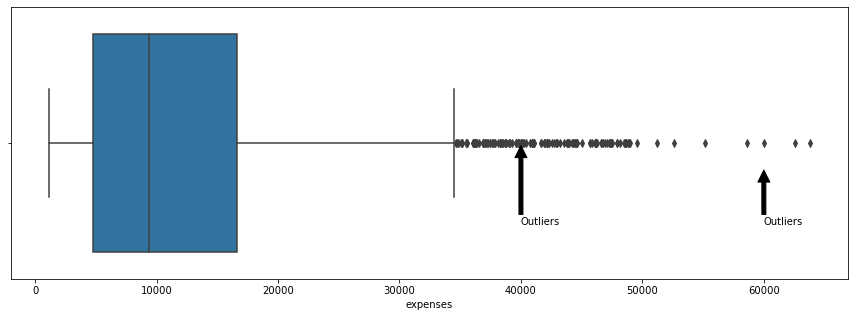

In [141]:
# set the plot size
plt.figure(figsize=(15,5))

# plot the boxplot
sns.boxplot(data.expenses)

# to draw the arrows 
# use the method annotate()
# annotate the text at point xy
# xytext: location of the text and the tail of the arrow
# xy: location of the text and the head of the arrow
# arrowprops: color of the arrow
plt.annotate("Outliers",xy = (40000,0.01), xytext = (40000, 0.3),arrowprops = {'facecolor' : 'black'})
plt.annotate("Outliers",xy = (60000,0.1),  xytext = (60000, 0.3),arrowprops = {'facecolor' : 'black'} )

plt.show()

C:\Users\shank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


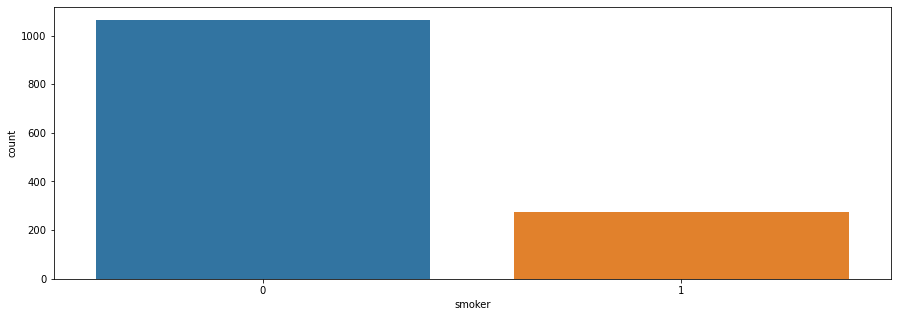

In [53]:
# set the plot size
plt.figure(figsize=(15,5))

# plot the boxplot
sns.countplot(data.smoker)

# to draw the arrows 
# use the method annotate()
# annotate the text at point xy
# xytext: location of the text and the tail of the arrow
# xy: location of the text and the head of the arrow
# arrowprops: color of the arrow
# plt.annotate("Outliers",xy = (4,0.01), xytext = (40000, 0.3),arrowprops = {'facecolor' : 'black'})
# plt.annotate("Outliers",xy = (6,0.1),  xytext = (60000, 0.3),arrowprops = {'facecolor' : 'black'} )

plt.show()

The above figures of boxplot and coutplots confirm that there is presence of skewed/exteme datapoints

In [99]:
# Gender-wise bmi distribution

data.groupby('sex')['bmi'].mean()

sex
female    30.379758
male      30.945266
Name: bmi, dtype: float64

In [101]:
# Gender wise expenses

data.groupby('sex')['expenses'].mean()

sex
female    12569.578897
male      13956.751420
Name: expenses, dtype: float64

In [103]:
# Gender-wise age distribution

data.groupby('sex')['age'].mean()

sex
female    39.503021
male      38.917160
Name: age, dtype: float64

In [106]:
# Gender value counts
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [107]:
# Region value counts
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [108]:
# Number of children value
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

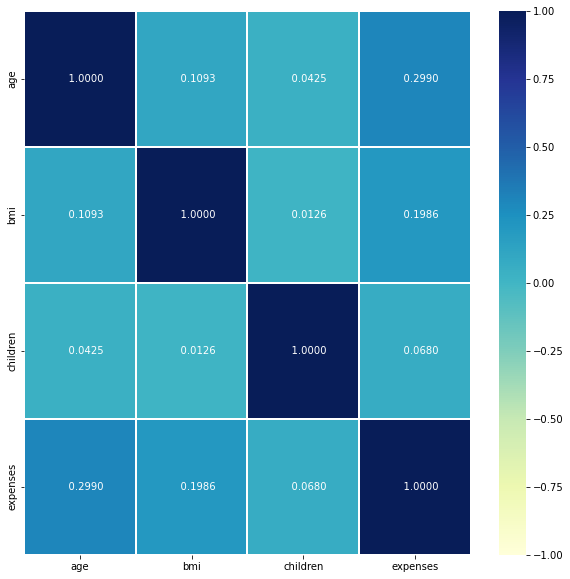

In [143]:
# set the plot size
fig,ax = plt.subplots(figsize=(10, 10))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')

# display the plot
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

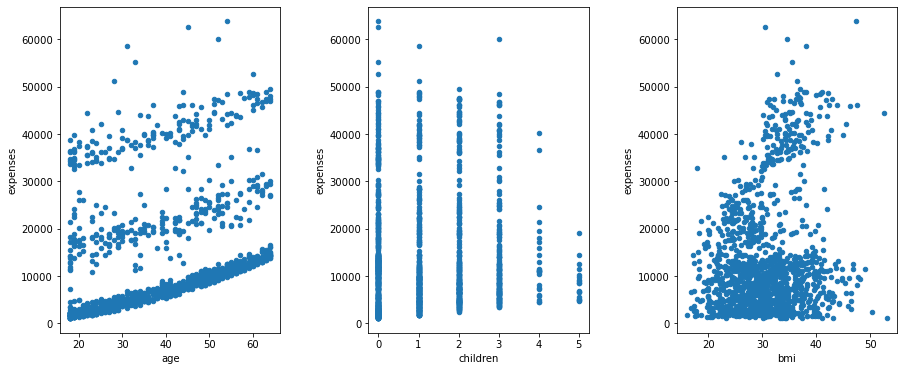

In [11]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
data.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
data.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
data.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

From the above graph and we can see a linear positive relation between age and expense.

However the expense and bmi needs to be examined further as patients with smoking habits need to be plotted

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

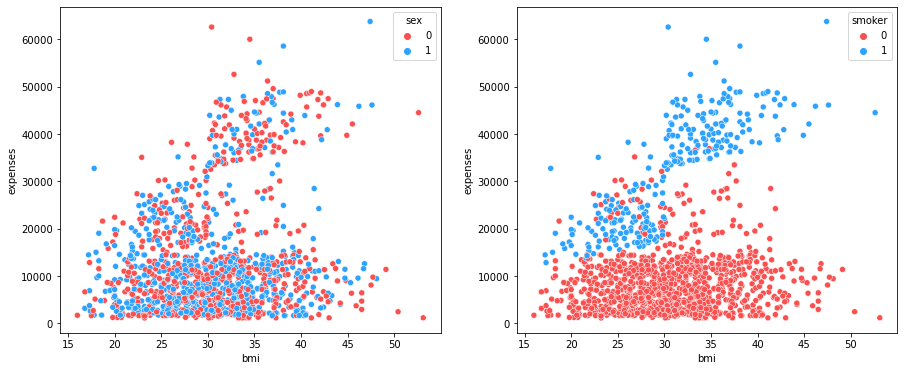

In [55]:
palette=['#FB5050','#2EA2FF']
fig, axes = plt.subplots(ncols=2, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=data,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=data,hue='smoker', palette=palette)

Here as we anticipated, the expenses of smokers is considerably higher as compared to non-smokers

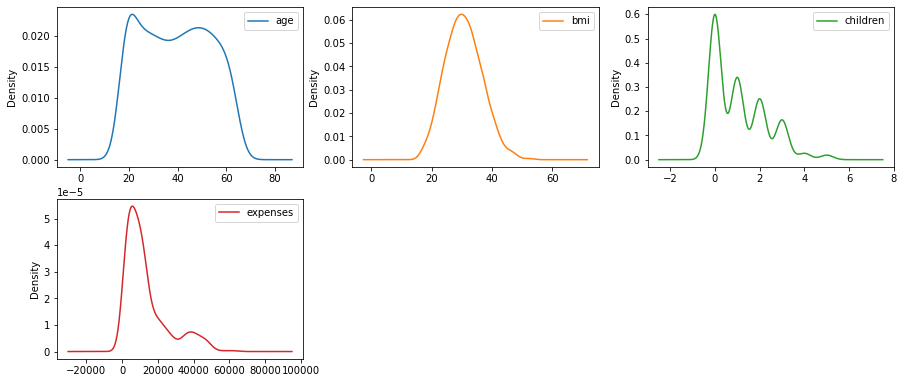

In [126]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [130]:
# Skewness
skew = data.skew()
skew

C:\Users\shank\AppData\Local\Temp\ipykernel_21652\1942105741.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew = data.skew()


age         0.055673
bmi         0.284593
children    0.938380
expenses    1.515880
dtype: float64

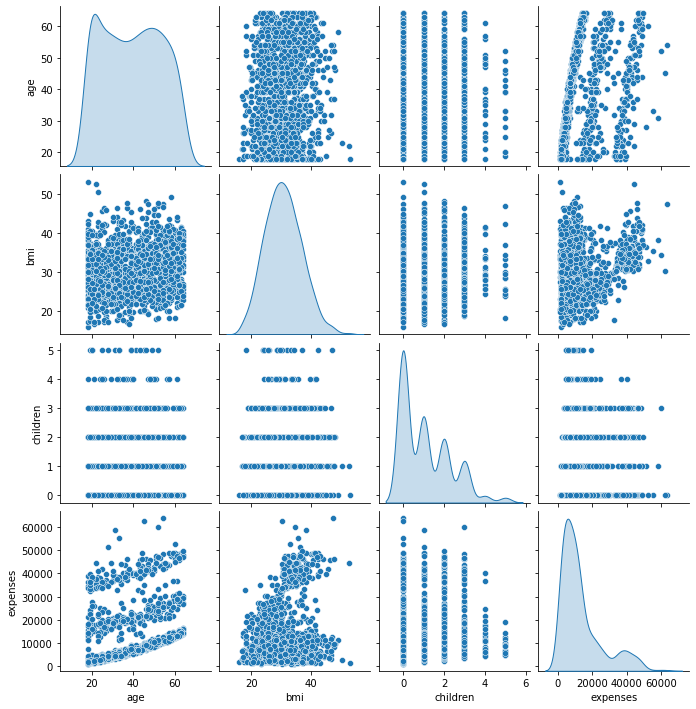

In [149]:
sns.pairplot(data,diag_kind = 'kde')

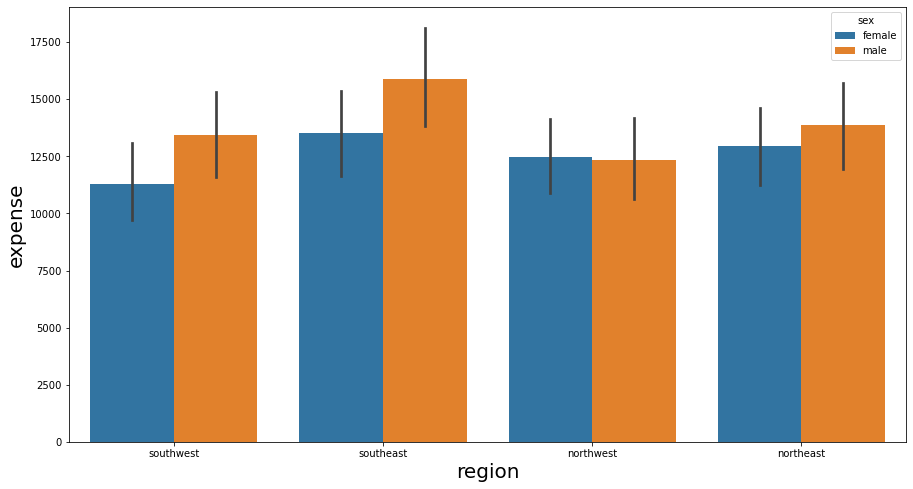

In [65]:
# set the figure size
plt.rcParams["figure.figsize"] = [15,8]

# create a barplot using two categorical variables
# use 'hue' to add 3rd variable in the barplot
# let the barplot definition be assigned to  variable 'ax'  
ax = sns.barplot(data=data, x='region', y='expenses', hue='sex')

# set the label for y-axis
ax.set_ylabel('expense', fontsize=20)

# set the label for x-axis
ax.set_xlabel('region', fontsize=20)

# display the plot
plt.show()

# Model Building

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [28]:
data.drop("region",axis=1,inplace=True)
data.head()

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86


In [31]:
# Changing categorical variables with binary values to 0's and 1's

data['sex'] = data['sex'].map(lambda x:1 if x=='female' else 0)
data['smoker'] = data['smoker'].map(lambda x:1 if x=='yes' else 0)
data.head()

,age,sex,bmi,children,smoker,expenses
0,19,1,27.9,0,1,16884.92
1,18,0,33.8,1,0,1725.55
2,28,0,33.0,3,0,4449.46
3,33,0,22.7,0,0,21984.47
4,32,0,28.9,0,0,3866.86


In [33]:
# Splitting the dependent and independent variable

X = data.drop(['expenses'],axis=1)
y = data.expenses

print("Shape of X is",X.shape)
print("Shape of y is",y.shape)

Shape of X is (1338, 5)
Shape of y is (1338,)


In [36]:
# Splitting train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7952529674123328


In [37]:
result = pd.DataFrame({'Actual': y_test,'Predict':y_test_pred})
result

,Actual,Predict
578,9724.53,11456.260710
610,8547.69,9934.793123
569,45702.02,37778.385938
1034,12950.07,15858.505279
198,9644.25,6953.500191
...,...,...
574,13224.06,14430.265988
1174,4433.92,6701.983467
1327,9377.90,11141.700468
817,3597.60,7201.002180


In [38]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    accuracy_model_train = r2_score(y_train, y_pred_model_train)
    
    print("Training Accuracy: ", accuracy_model_train)
    accuracy_model_test = r2_score(y_test, y_pred_model_test)
    
    print("Testing Accuracy: ", accuracy_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    
    print("RMSE for Testing Data: ", RMSE_model_test)

    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [40]:
from sklearn.linear_model import LinearRegression  

multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  
model_summary(multiple_linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Training Accuracy:  0.7041716740648187
Testing Accuracy:  0.7612631671621253
RMSE for Training Data:  6501.677746037319
RMSE for Testing Data:  6130.694666180572
Accuracy for 20 - Fold Cross Predicted:  0.7164406277916135


In [41]:
from sklearn.svm import SVR  

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  
support_vector_reg.fit(X_train, y_train)  
model_summary(support_vector_reg, "Support_Vector_Regressor")

Support_Vector_Regressor
Training Accuracy:  0.6142832466866621
Testing Accuracy:  0.6696140081752671
RMSE for Training Data:  7424.031626482947
RMSE for Testing Data:  7212.084153102194
Accuracy for 20 - Fold Cross Predicted:  0.7009535008136862


In [42]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  
x_train_poly = polynomial_features.fit_transform(X_train)  
x_test_poly = polynomial_features.fit_transform(X_test) 
polynomial_reg = LinearRegression(fit_intercept=False)  
polynomial_reg.fit(x_train_poly, y_train)  
print("PolynomialFeatures")

y_pred_PR_train = polynomial_reg.predict(x_train_poly)
y_pred_PR_test = polynomial_reg.predict(x_test_poly)
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy: ", accuracy_PR_train)

accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy: ", accuracy_PR_test)

RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=20)
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 20-Fold Cross Predicted: ", accuracy_cv_PR)

PolynomialFeatures
Training Accuracy:  0.8355726953236507
Testing Accuracy:  0.8811186938127149
RMSE for Training Data:  4847.217762578631
RMSE for Testing Data:  4326.201634541896
Accuracy for 20-Fold Cross Predicted:  0.8393113776369793


In [43]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
model_summary(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression
Training Accuracy:  0.8694256881440832
Testing Accuracy:  0.8711333328640294
RMSE for Training Data:  4319.509514116047
RMSE for Testing Data:  4504.2270173711995
Accuracy for 20 - Fold Cross Predicted:  0.8519568550673102


In [44]:
from sklearn.ensemble import RandomForestRegressor  

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  
random_forest_reg.fit(X_train, y_train) 
model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Training Accuracy:  0.8782029030008719
Testing Accuracy:  0.8970115652896674
RMSE for Training Data:  4171.805291405803
RMSE for Testing Data:  4026.652964491143
Accuracy for 20 - Fold Cross Predicted:  0.857751048313981


From the above set of models , Random Forest has yeilded the best results

                                                        -----------------